In [2]:
import pandas as pd
import numpy as np

# Parámetros
materias = ['MAT101']
grupos = ['G1']
estudiantes = [
    {'Estudiante_ID': 1001, 'Nombre': 'Ana'},
    {'Estudiante_ID': 1002, 'Nombre': 'Luis'},
    {'Estudiante_ID': 1003, 'Nombre': 'Carlos'},
    {'Estudiante_ID': 1004, 'Nombre': 'Valeria'},
    {'Estudiante_ID': 1005, 'Nombre': 'Jorge'},
    {'Estudiante_ID': 1006, 'Nombre': 'María'},
    {'Estudiante_ID': 1007, 'Nombre': 'Andrés'},
    {'Estudiante_ID': 1008, 'Nombre': 'Paola'},
    {'Estudiante_ID': 1009, 'Nombre': 'Juan'},
    {'Estudiante_ID': 1010, 'Nombre': 'Laura'},
]

# Componentes y cortes
componentes = ['Parcial', 'Actividades', 'Certificación', 'Autoevaluación', 'Proyecto']
cortes = [1, 2, 3]

# Generar datos sintéticos
rows = []
np.random.seed(42)

for estudiante in estudiantes:
    for corte in cortes:
        fila = {
            'Materia': 'MAT101',
            'Grupo': 'G1',
            'Estudiante_ID': estudiante['Estudiante_ID'],
            'Nombre': estudiante['Nombre'],
            'Corte': corte
        }
        # Notas aleatorias entre 2.5 y 5.0
        for comp in componentes:
            fila[comp] = round(np.random.uniform(2.5, 5.0), 1)
        rows.append(fila)

# Crear DataFrame
df = pd.DataFrame(rows)

# Guardar como CSV
df.to_csv('notas_estudiantes.csv', index=False)
print("Archivo 'notas_estudiantes.csv' generado exitosamente.")

Archivo 'notas_estudiantes.csv' generado exitosamente.


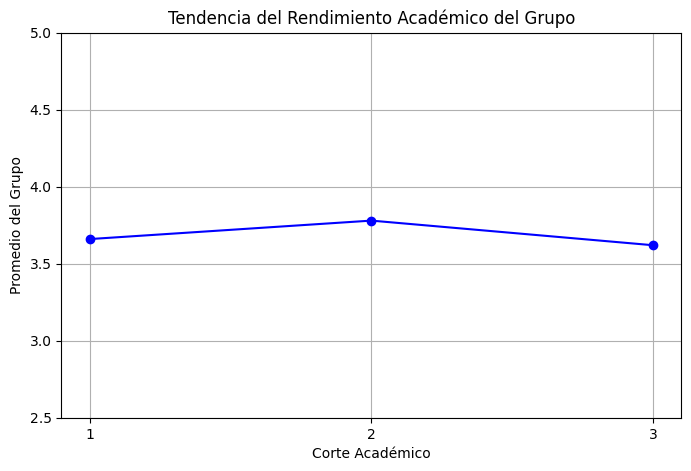

Del corte 1 al corte 2 hay una mejora (0.12 puntos).
Del corte 2 al corte 3 hay una descenso (-0.16 puntos).


In [3]:
#Archivo ipynb

# Paso 1: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Paso 2: Cargar el archivo CSV
df = pd.read_csv('notas_estudiantes.csv')
df.head()

# Paso 3: Calcular la nota definitiva usando las ponderaciones

# Definir ponderaciones
ponderaciones = {
    'Parcial': 0.3,
    'Actividades': 0.2,
    'Certificación': 0.15,
    'Autoevaluación': 0.1,
    'Proyecto': 0.25
}

# Calcular la nota definitiva por fila (por estudiante y corte)
df['Nota_Definitiva'] = (
    df['Parcial'] * ponderaciones['Parcial'] +
    df['Actividades'] * ponderaciones['Actividades'] +
    df['Certificación'] * ponderaciones['Certificación'] +
    df['Autoevaluación'] * ponderaciones['Autoevaluación'] +
    df['Proyecto'] * ponderaciones['Proyecto']
)

# Redondear a un decimal
df['Nota_Definitiva'] = df['Nota_Definitiva'].round(1)

# Verificar los datos
df.head()

# Paso 4: Calcular el promedio grupal por corte
promedios_corte = df.groupby('Corte')['Nota_Definitiva'].mean().reset_index()
promedios_corte['Nota_Definitiva'] = promedios_corte['Nota_Definitiva'].round(2)
promedios_corte

# Paso 5: Graficar la tendencia del rendimiento del grupo

plt.figure(figsize=(8, 5))
plt.plot(promedios_corte['Corte'], promedios_corte['Nota_Definitiva'], marker='o', color='blue')
plt.title('Tendencia del Rendimiento Académico del Grupo')
plt.xlabel('Corte Académico')
plt.ylabel('Promedio del Grupo')
plt.xticks([1, 2, 3])
plt.grid(True)
plt.ylim(2.5, 5)
plt.show()

# Paso 6: Interpretar el comportamiento entre cortes

for i in range(1, len(promedios_corte)):
    corte_anterior = promedios_corte.loc[i - 1, 'Nota_Definitiva']
    corte_actual = promedios_corte.loc[i, 'Nota_Definitiva']
    cambio = corte_actual - corte_anterior

    if cambio > 0.05:
        tendencia = 'mejora'
    elif cambio < -0.05:
        tendencia = 'descenso'
    else:
        tendencia = 'estabilidad'

    print(f"Del corte {i} al corte {i+1} hay una {tendencia} ({cambio:.2f} puntos).")
